In [2]:
import sys
!{sys.executable} -m pip install --upgrade https://github.com/aparrish/bezmerizing/archive/master.zip

     / 156 kB 579 kB/s
  Created wheel for bezmerizing: filename=bezmerizing-0.1.1-py3-none-any.whl size=17284 sha256=5c58d43b837c351604611bfa1df8bd4c4a1d010d31fc32b5910a3ee7af14ff13
  Stored in directory: /private/var/folders/jx/w26nlpj56491_9m44ty4md340000gn/T/pip-ephem-wheel-cache-xtuxaxob/wheels/74/5a/7d/4a62c2490b6c6061916e41ae070caaed12664893aef1a56d7c
Successfully built bezmerizing
  Attempting uninstall: bezmerizing
    Found existing installation: bezmerizing 0.1.1
    Uninstalling bezmerizing-0.1.1:
      Successfully uninstalled bezmerizing-0.1.1


In [11]:
from flat import document, rgb, rgba, font, strike, shape
from flat.command import moveto, quadto, curveto, lineto, closepath
from bezmerizing import Polyline, Path
import numpy as np
from copy import copy
import unicodedata
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [12]:
f = font.open("./NewTegomin-Regular.ttf")

In [13]:
def glyphcommands(f, ch):
    return Path([copy(cmd) for cmd in f.glyph(f.charmap[ord(ch)])])
def advancefor(f, ch):
    return f.advances[f.charmap[ord(ch)]]

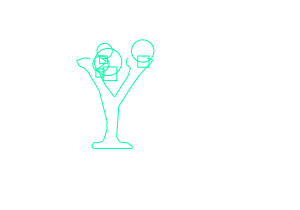

In [17]:
from math import sqrt
import numpy as np
d = document(300, 210, 'pt')
page = d.addpage()
pen = shape().stroke(rgba(0, 255, 168, 255)).nofill()
factor = 144 / f.density
cx = 0
cy = 0
glyph_path = glyphcommands(f, "Y").scale(factor).translate(72, 150)
for cmd in glyph_path:
    if type(cmd) == lineto:
        posy = np.random.randint(20) + 50
        radius = sqrt(pow(cx - cmd.x, 2) + pow(cy - cmd.y*1.2, 2)) * 0.5
        page.place(pen.rectangle((cx + cmd.x) / 2, posy, radius, radius))
        page.place(pen.circle((cx + cmd.x) / 2 + 5, posy - 5, radius))
    elif type(cmd) in (curveto, quadto):
        page.place(pen.line(cx, cy, cmd.x, cmd.y))
    if type(cmd) != type(closepath):
        cx = cmd.x
        cy = cmd.y
show(page)

In [19]:
import ipywidgets as widgets

In [21]:
float_slider = widgets.FloatSlider(
    description="dairy content",
    value=0.5,
    min=0,
    max=1,
    step=0.05)
display(float_slider)

FloatSlider(value=0.5, description='dairy content', max=1.0, step=0.05)

In [25]:
def drawGlyphTree(glyph="Y"):
    d = document(300, 210, 'pt')
    page = d.addpage()
    pen = shape().stroke(rgba(0, 255, 168, 255)).nofill()
    factor = 144 / f.density
    cx = 0
    cy = 0
    glyph_path = glyphcommands(f, glyph).scale(factor).translate(72, 150)
    for cmd in glyph_path:
        if type(cmd) == lineto:
            posy = np.random.randint(20) + 50
            radius = sqrt(pow(cx - cmd.x, 2) + pow(cy - cmd.y*1.2, 2)) * 0.5
            page.place(pen.rectangle((cx + cmd.x) / 2, posy, radius, radius))
            page.place(pen.circle((cx + cmd.x) / 2 + 5, posy - 5, radius))
        elif type(cmd) in (curveto, quadto):
            page.place(pen.line(cx, cy, cmd.x, cmd.y))
        if type(cmd) != type(closepath):
            cx = cmd.x
            cy = cmd.y
    show(page)

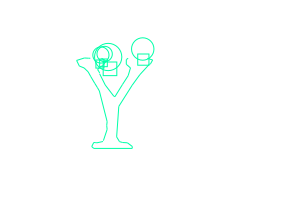

In [26]:
drawGlyphTree()

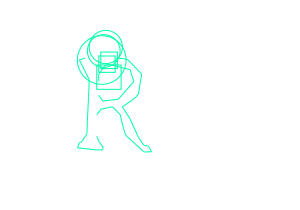

In [27]:
drawGlyphTree("R")

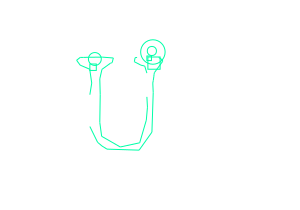

In [28]:
drawGlyphTree("U")

In [32]:
def disp_square(size=40):
    page = document(80, 80, 'mm').addpage()
    pen = shape().fill(rgb(120, 40, 160)).nostroke()
    page.place(pen.rectangle(10, 10, size, size))
    show(page)

In [46]:
glyph_slider = widgets.IntSlider(min=0, max=10, value=5)
glyphsArray = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L"]


display(glyph_slider)
widgets.interact(drawGlyphTree, value=glyphsArray[glyph_slider.value])
# widgets.interact(disp_square, size=size_slider)
# print(glyphsArray[size_slider.value])

IntSlider(value=5, max=10)

interactive(children=(Text(value='Y', description='glyph'), Output()), _dom_classes=('widget-interact',))

<function __main__.drawGlyphTree(glyph='Y')>

In [47]:
def drawGlyphTreeByValue(value=1):
    glyphsArray = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L"]
    glyph = glyphsArray[value]
    d = document(300, 210, 'pt')
    page = d.addpage()
    pen = shape().stroke(rgba(0, 255, 168, 255)).nofill()
    factor = 144 / f.density
    cx = 0
    cy = 0
    glyph_path = glyphcommands(f, glyph).scale(factor).translate(72, 150)
    for cmd in glyph_path:
        if type(cmd) == lineto:
            posy = np.random.randint(20) + 50
            radius = sqrt(pow(cx - cmd.x, 2) + pow(cy - cmd.y*1.2, 2)) * 0.5
            page.place(pen.rectangle((cx + cmd.x) / 2, posy, radius, radius))
            page.place(pen.circle((cx + cmd.x) / 2 + 5, posy - 5, radius))
        elif type(cmd) in (curveto, quadto):
            page.place(pen.line(cx, cy, cmd.x, cmd.y))
        if type(cmd) != type(closepath):
            cx = cmd.x
            cy = cmd.y
    show(page)

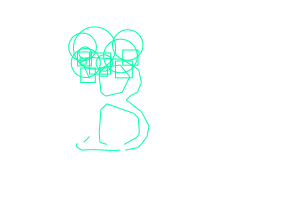

In [48]:
drawGlyphTreeByValue()

In [49]:
glyph_slider = widgets.IntSlider(min=0, max=10, value=5)
widgets.interact(drawGlyphTreeByValue, value=glyph_slider)

interactive(children=(IntSlider(value=5, description='value', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.drawGlyphTreeByValue(value=1)>